<a href="https://colab.research.google.com/github/Bak-cell/churn/blob/main/PROJET_DATA_CHALLENGE_DATA_TOUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



** PROJET DATA CHALLENGE DATA TOUR**


1.   EXTRACTION DES DONNEES

  a. Intstalation des packages  et chargement des package



In [ ]:
 # chargement des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


b.  chargement des jeux de données

In [ ]:
traint = pd.read_csv('https://raw.githubusercontent.com/dataafriquehub/energy_data/refs/heads/main/train.csv')
testt = pd.read_csv('https://raw.githubusercontent.com/dataafriquehub/energy_data/refs/heads/main/test.csv')
sousmission = pd.read_csv('https://raw.githubusercontent.com/dataafriquehub/energy_data/refs/heads/main/submission.csv')

2.  EDA

*   Nombre de lignes  sur les données d'entrainement




In [ ]:
print("Information sur le dataframe :")
print(testt.info())
traint = testt.drop_duplicates()
print(testt.shape)
# Obtenir le nombre de valeurs nulles par colonne
null_counts = traint.isnull().sum()

print("Nombre de valeurs nulles par colonne :")
print(null_counts)

Information sur le dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62500 entries, 0 to 62499
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 62500 non-null  object 
 1   lat                                     62500 non-null  float64
 2   lon                                     62500 non-null  float64
 3   population                              62500 non-null  int64  
 4   taux_ensoleillement                     62500 non-null  float64
 5   demande_energetique_actuelle            62500 non-null  float64
 6   demande_energetique_projectee           62500 non-null  float64
 7   capacite_installee_actuelle             62500 non-null  float64
 8   duree_ensoleillement_annuel             62500 non-null  float64
 9   cout_installation_solaire               62500 non-null  float64
 10  proximite_infrastructures_e

In [ ]:
traint.head()

,country,lat,lon,population,taux_ensoleillement,demande_energetique_actuelle,demande_energetique_projectee,capacite_installee_actuelle,duree_ensoleillement_annuel,cout_installation_solaire,...,taux_adoption_energies_renouvelables,stabilite_politique,taux_acces_energie,niveau_urbanisation,potentiel_investissement,types_sols,emissions_co2_evitees,idh,habit_de_mariage,nombre_animaux_domestiques
0,Guinea,9.9456,-9.6966,13132795,4.127216,1742.542776,2157.259405,1021.851235,3835.946683,872.520272,...,NaN,7.379525,76.425479,35.358111,5,rocheux,4048.488123,0.328018,moderne,7
1,Mauritania,21.0079,-10.9408,4649658,5.008540,255.495071,428.684740,1617.543567,2739.032034,1096.259730,...,49.593022,1.084977,57.176834,49.970568,4,argileux,6999.991146,0.400916,traditionnel,5
2,South Africa,-30.5595,22.9375,59308690,6.976930,3768.494240,5678.901223,946.143038,2011.915469,938.680998,...,10.298804,6.788885,78.470385,61.007593,5,argileux,6697.363318,0.397704,moderne,1
3,Lesotho,-29.6099,28.2336,2142249,5.076239,2060.610984,2315.866464,1962.312061,2002.905853,990.823495,...,27.431191,7.556819,88.105215,55.505618,1,argileux,2178.227735,0.527368,moderne,0
4,Comoros,-11.6455,43.3333,869601,6.462166,2080.772325,2952.531976,623.492275,3800.268025,1157.289352,...,41.894886,5.920871,31.325681,47.514292,4,rocheux,6494.836948,0.425716,traditionnel,7




*   Analyse univarié pour chaque variable



Le nombre de pays Africain
53


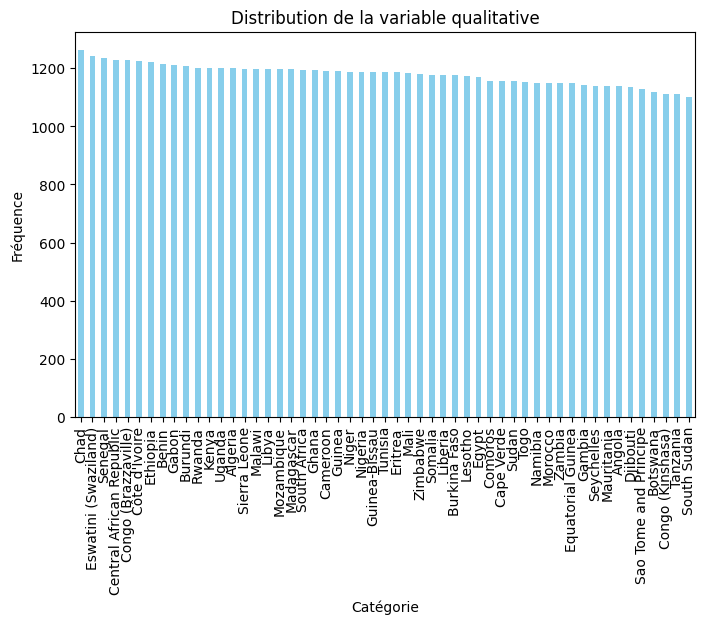

Les données sont equilibrées sur toute les pays 


In [ ]:
# distribution contry
labels = traint['country'].nunique()
print("Le nombre de pays Africain")
print(labels)

freq = traint['country'].value_counts()
plt.figure(figsize=(8, 5))
freq.plot(kind='bar', color='skyblue')
plt.title("Distribution de la variable qualitative")
plt.xlabel("Catégorie")
plt.ylabel("Fréquence")
plt.show()

print("Les données sont equilibrées sur toute les pays ")


In [ ]:
# pays vs demande_energetique_projectee
import pandas as pd
from scipy.stats import f_oneway


groupes = [traint[traint["country"] == cat]["demande_energetique_projectee"] for cat in traint["country"].unique()]

# Test ANOVA
stat, p_value = f_oneway(*groupes)
print("Statistique F:", stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Il y a une différence significative entre les pays au vue de la demande projecte")
else:
    print("Pas de différence significative entre les pays au vue de la demande projecte")

Statistique F: 1.2953336004664011
P-value: 0.07463736422533179
Pas de différence significative entre les pays au vue de la demande projecte


La plupart des régions ont des populations relativement faibles.
Cependant, quelques régions ont des populations très élevées, ce qui est illustré par les valeurs aberrantes(population superieur à 62M) . Il s'agit des regions du Congo (Kinshasa), de l'egypte ,l' Ethiopia et le Nigeria



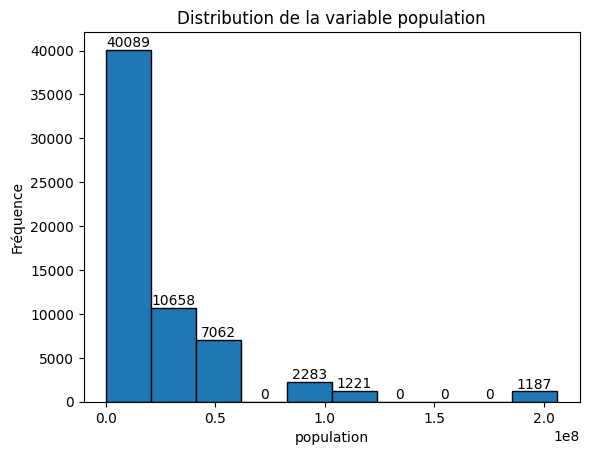

[9.83470000e+04 2.07024712e+07 4.13065954e+07 6.19107196e+07
 8.25148438e+07 1.03118968e+08 1.23723092e+08 1.44327216e+08
 1.64931341e+08 1.85535465e+08 2.06139589e+08]


In [ ]:
# Création de l'histogramme et récupération des résultats
n, bins, patches = plt.hist(traint['population'], bins=10, edgecolor='black')

# Affichage des fréquences et des bords des bins
for i in range(len(bins)-1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, n[i], f'{n[i]:.0f}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('population')
plt.ylabel('Fréquence')
plt.title('Distribution de la variable population')
plt.show()
print(bins)

Cela supposue que nous povons segmenter la varibale population en 3 categorie :


*   Zone faiblement peuplée :population entre 0 et 62 millions  
*   Zone moyennement peuplée :population entre 62 et 185millions  
*   Zone  peuplée :population superieur à 185 millions


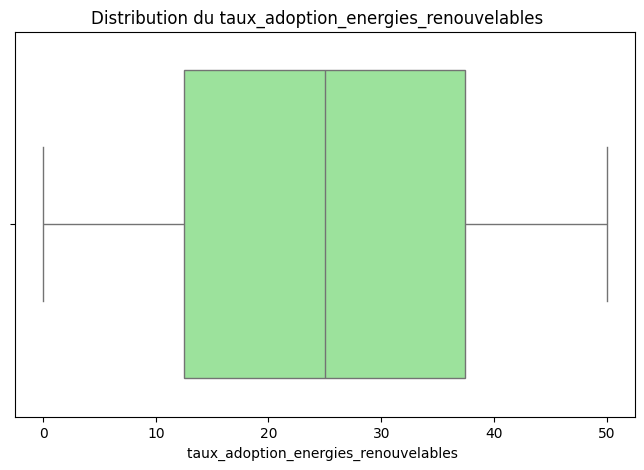

In [ ]:
# taux_adoption_energies_renouvelables
plt.figure(figsize=(8, 5))
sns.boxplot(x=traint['taux_adoption_energies_renouvelables'], color='lightgreen')
plt.title("Distribution du taux_adoption_energies_renouvelables   ")
plt.xlabel("taux_adoption_energies_renouvelables ")
plt.show()

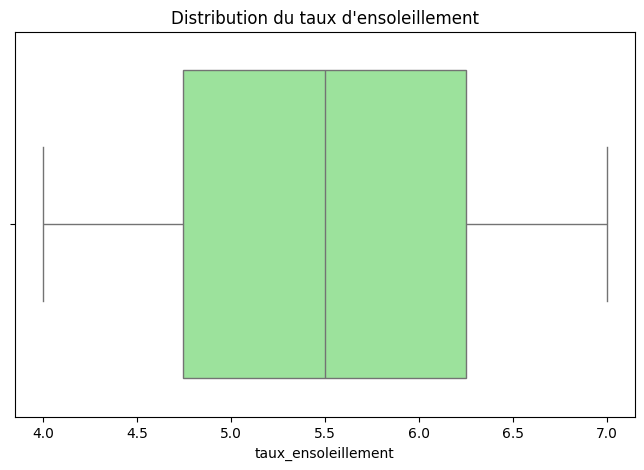

In [ ]:
# taux_ensoleillement

plt.figure(figsize=(8, 5))
sns.boxplot(x=traint['taux_ensoleillement'], color='lightgreen')
plt.title("Distribution du taux d'ensoleillement")
plt.xlabel("taux_ensoleillement")
plt.show()

Le taux d'ensoleillent est parfaitement symetrique.
il y a autant de region  avec un taux d'ensoleillement superieur ou inferieur à 5,5. La tranformation possible est la normalisation de la variable  

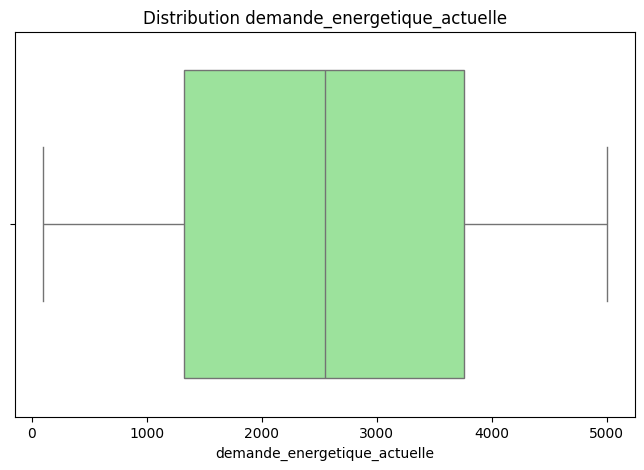

In [ ]:
#demande_energetique_actuelle


plt.figure(figsize=(8, 5))
sns.boxplot(x=traint['demande_energetique_actuelle'], color='lightgreen')
plt.title("Distribution demande_energetique_actuelle")
plt.xlabel("demande_energetique_actuelle")
plt.show()

La demande energtique actuelle est parfaitement symetrique.
il y a autant de region  avec une demande energetique superieur ou inferieur à 2500.

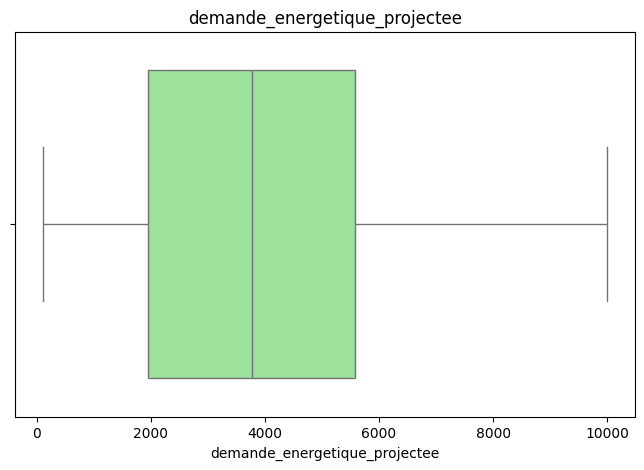

In [ ]:
#demande_energetique_projectee
plt.figure(figsize=(8, 5))
sns.boxplot(x=traint['demande_energetique_projectee'], color='lightgreen')
plt.title("demande_energetique_projectee")
plt.xlabel("demande_energetique_projectee")
plt.show()

Il y a certaines region dont la demande projectée est proche de zéro alors que dans d'autre regione la demande est proche de 10 000 avec une moyenne proche de 4000  

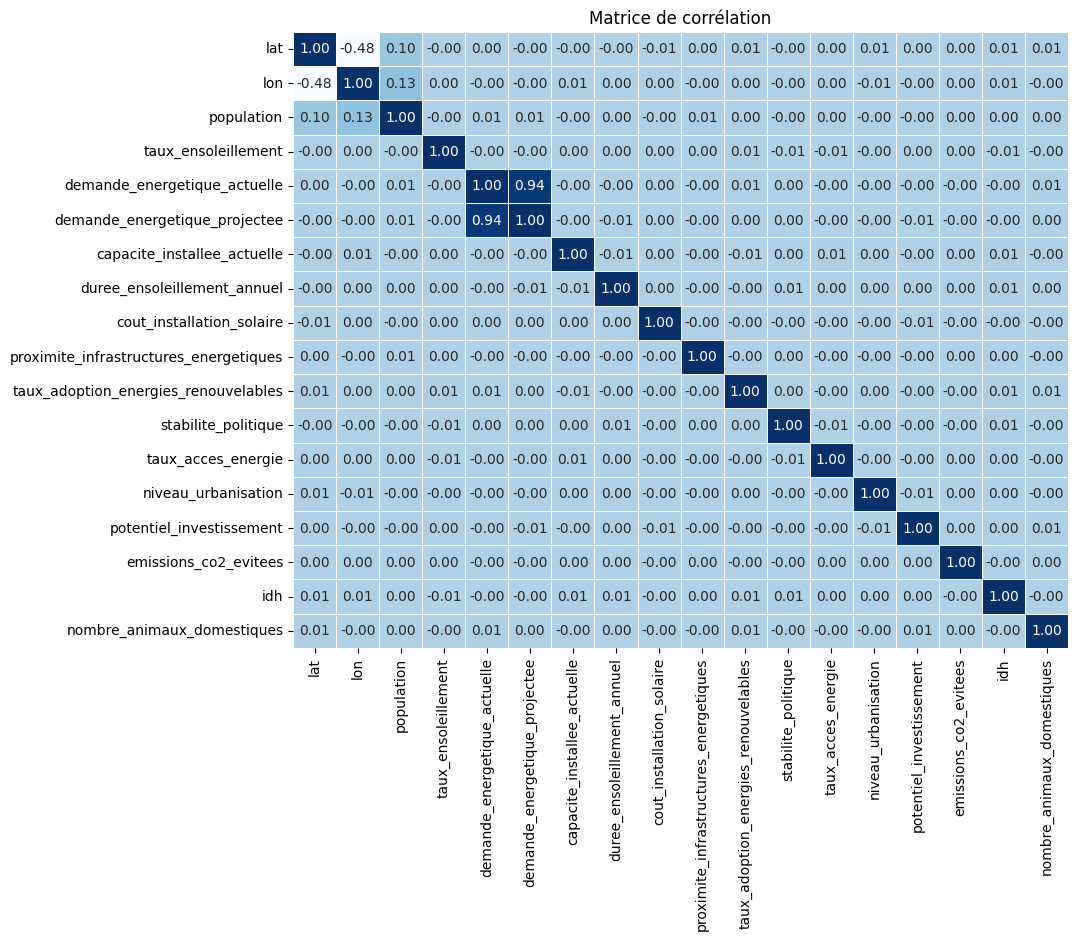

In [ ]:

quantitative_df = traint.select_dtypes(include=['number'])

# Calcul de la matrice de corrélation
correlation_matrix = quantitative_df.corr()

# Calculer la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, cbar=False)
plt.title("Matrice de corrélation")
plt.show()

Nous constatons qu'il y a une corrélation lineaire entre la demande actuelle et projectée.
De plus, les variables lont et lat sont corrélées

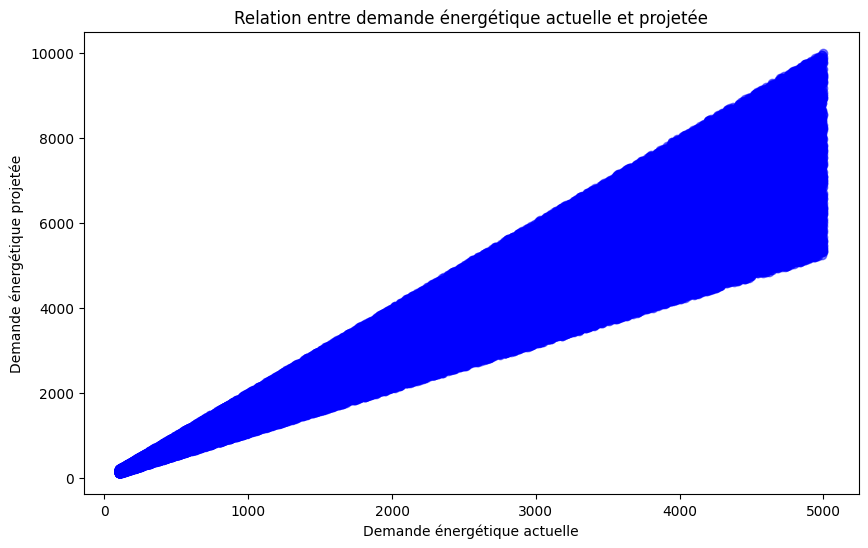

In [ ]:
x = traint['demande_energetique_actuelle']
y = traint['demande_energetique_projectee']

# Option 1 : Utiliser Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, c='blue')  # alpha contrôle la transparence
plt.title('Relation entre demande énergétique actuelle et projetée')
plt.xlabel('Demande énergétique actuelle')
plt.ylabel('Demande énergétique projetée')
plt.show()


Analyse duree_ensoleillement_annuel  , cout_installation_solaire ,proximite_infrastructures_energetiques, taux_adoption_energies_renouvelables

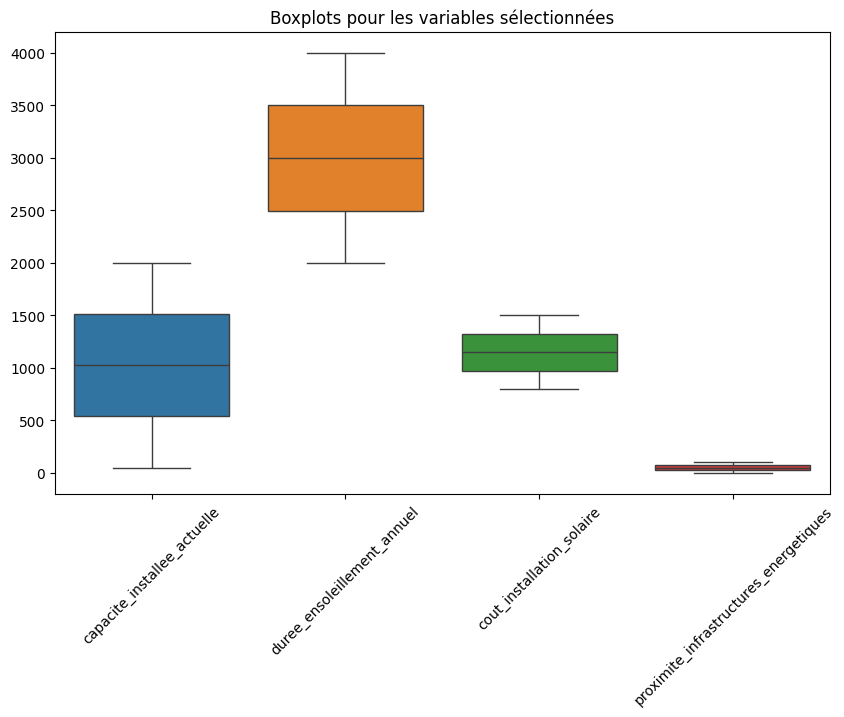

In [ ]:
variables_a_afficher = ['capacite_installee_actuelle','duree_ensoleillement_annuel', 'cout_installation_solaire','proximite_infrastructures_energetiques']

# Créer un boxplot pour les variables sélectionnées
plt.figure(figsize=(10, 6))
sns.boxplot(data=traint[variables_a_afficher])
plt.title("Boxplots pour les variables sélectionnées")
plt.xticks(rotation=45)  # Rotation des labels de l'axe des x pour une meilleure lisibilité
plt.show()

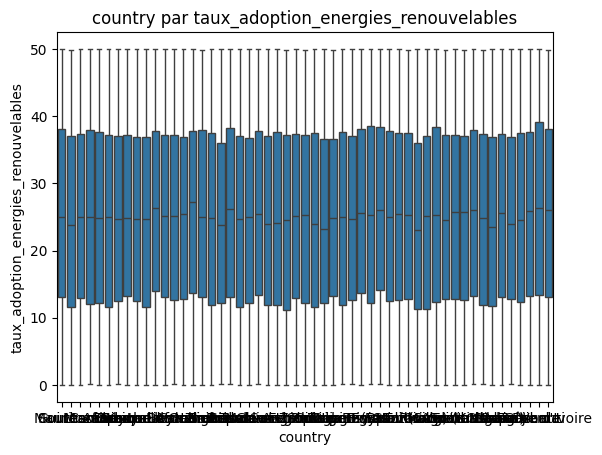

In [ ]:
#taux_adoption_energies_renouvelables

sns.boxplot(x="country", y="taux_adoption_energies_renouvelables", data=traint)
plt.title("country par taux_adoption_energies_renouvelables")
plt.xlabel("country")
plt.ylabel("taux_adoption_energies_renouvelables")
plt.show()

In [ ]:

mean_by_country = traint.groupby('country')['taux_adoption_energies_renouvelables'].transform('mean')
# Remplacer les valeurs manquantes par la moyenne du pays
traint['taux_adoption_energies_renouvelables'] = traint['taux_adoption_energies_renouvelables'].fillna(mean_by_country)


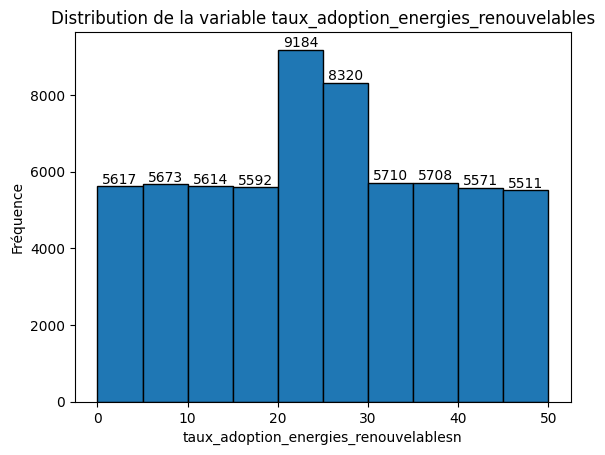

[1.62718528e-03 5.00142129e+00 1.00012154e+01 1.50010095e+01
 2.00008036e+01 2.50005977e+01 3.00003918e+01 3.50001859e+01
 3.99999801e+01 4.49997742e+01 4.99995683e+01]


In [ ]:
# Création de l'histogramme et récupération des résultats
n, bins, patches = plt.hist(traint['taux_adoption_energies_renouvelables'], bins=10, edgecolor='black')

# Affichage des fréquences et des bords des bins
for i in range(len(bins)-1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, n[i], f'{n[i]:.0f}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('taux_adoption_energies_renouvelablesn')
plt.ylabel('Fréquence')
plt.title('Distribution de la variable taux_adoption_energies_renouvelables')
plt.show()
print(bins)

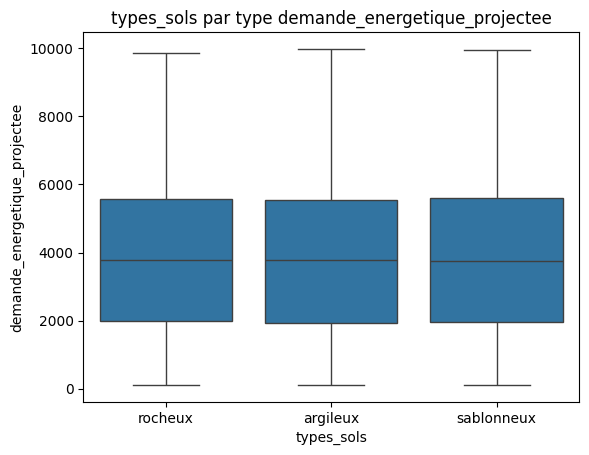

In [ ]:
# types_sols vs demande_energetique_projectee

sns.boxplot(x="types_sols", y="demande_energetique_projectee", data=traint)
plt.title("types_sols par type demande_energetique_projectee")
plt.xlabel("types_sols")
plt.ylabel("demande_energetique_projectee")
plt.show()

Le type de sol n'as pas d'impact sur la demandée projectée

# **MODELE FINAL : REGRESSION LINEAIRE RIDGE**

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from math import sqrt
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [ ]:
# Charger les données d'entraînement et de test
train_url = "https://raw.githubusercontent.com/dataafriquehub/energy_data/refs/heads/main/train.csv"
test_url = "https://raw.githubusercontent.com/dataafriquehub/energy_data/refs/heads/main/test.csv"
train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

In [ ]:
# Idée : les régions proches géographiquement (latitude et longitude similaires) peuvent partager des caractéristiques
# similaires en termes de demande énergétique projetée ou d'accès à l'énergie. En regroupant les données basées sur
# leurs positions géographiques, nous espérons capturer ces similarités et enrichir notre modèle.

In [ ]:
# Combiner les données d'entraînement et de test pour le clustering
combined_data = pd.concat([train_data, test_data], ignore_index=True)

In [ ]:
# Appliquer K-means pour créer des clusters géographiques
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
combined_data['cluster'] = kmeans.fit_predict(combined_data[['lat', 'lon']])

In [ ]:
# Calculer la distance de chaque point au centre de son cluster
# Cette distance est ajoutée comme une nouvelle variable pour quantifier l'éloignement de chaque point par rapport au
# centre de son groupe. Une valeur élevée pourrait indiquer des anomalies ou des spécificités locales.
combined_data['distance_to_cluster_center'] = combined_data.apply(
    lambda row: np.sqrt((row['lat'] - kmeans.cluster_centers_[row['cluster']][0]) ** 2 +
                        (row['lon'] - kmeans.cluster_centers_[row['cluster']][1]) ** 2),
    axis=1
)


In [ ]:
# Séparer les données d'entraînement et de test après clustering
train_data = combined_data.iloc[:len(train_data)]
test_data = combined_data.iloc[len(train_data):]

In [ ]:
# Pré-traitement des données (ajout de country_id, encodage des valeurs qualitatives, ajout d'indicateurs)
train_data["country_id"] = train_data["country"].factorize()[0]
test_data["country_id"] = test_data["country"].factorize()[0]
# Remplacer les valeurs qualitatives par des valeurs quantitatives
types_sols_mapping = {"argileux": 15, "sablonneux": 19, "rocheux": 20}
train_data["types_sols"] = train_data["types_sols"].map(types_sols_mapping)
test_data["types_sols"] = test_data["types_sols"].map(types_sols_mapping)
habit_de_mariage_mapping = {"traditionnel": 1, "moderne": 0}
train_data["habit_de_mariage"] = train_data["habit_de_mariage"].map(habit_de_mariage_mapping)
test_data["habit_de_mariage"] = test_data["habit_de_mariage"].map(habit_de_mariage_mapping)
# Remplissage des valeurs manquantes
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)


<ipython-input-9-616ed6bbbd6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["country_id"] = train_data["country"].factorize()[0]
<ipython-input-9-616ed6bbbd6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["country_id"] = test_data["country"].factorize()[0]
<ipython-input-9-616ed6bbbd6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [ ]:
train_data.head()

,country,lat,lon,population,taux_ensoleillement,demande_energetique_actuelle,demande_energetique_projectee,capacite_installee_actuelle,duree_ensoleillement_annuel,cout_installation_solaire,...,niveau_urbanisation,potentiel_investissement,types_sols,emissions_co2_evitees,idh,habit_de_mariage,nombre_animaux_domestiques,cluster,distance_to_cluster_center,country_id
0,Zimbabwe,-19.0154,29.1549,14862924,5.004870,485.085906,544.232257,583.128945,3936.978948,926.985577,...,35.733884,4,0.0,555.209808,0.441787,0.0,2,4,2.569560,0
1,Congo (Brazzaville),-0.2280,15.8277,5518092,4.609972,1422.802172,1864.048290,163.908475,3753.749894,862.739803,...,40.134654,2,0.0,3722.310275,0.380139,0.0,5,1,1.304929,1
2,Namibia,-22.9576,18.4904,2540905,5.792826,4711.082367,5525.433108,1404.435659,3804.854034,1298.932535,...,46.964564,5,0.0,9824.421047,0.678362,0.0,0,4,12.891228,2
3,Somalia,5.1521,46.1996,15893222,4.104030,799.426659,1447.543617,1370.179083,2047.305693,1256.611785,...,40.211287,1,0.0,9407.183123,0.731126,0.0,7,2,9.248991,3
4,Congo (Kinshasa),-4.0383,21.7587,89561403,6.103335,2526.920477,3029.604497,962.398626,3421.335117,1484.398731,...,63.201230,3,0.0,9184.154421,0.357112,0.0,2,1,8.053428,4


In [ ]:
# Préparer les données pour l'entraînement et les tests en incluant les nouvelles colonnes
X_train = train_data[["habit_de_mariage","demande_energetique_actuelle","cluster","distance_to_cluster_center"]]
y_train = train_data[["demande_energetique_projectee"]]
X_test = test_data[['habit_de_mariage', 'demande_energetique_actuelle','cluster', 'distance_to_cluster_center']]
y_test = test_data[["demande_energetique_projectee"]]


In [ ]:
# Transformation des variables en polynômes pour capturer des relations non linéaires
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
# Définir une grille de valeurs pour alpha
alpha_values = [0.01, 0.1, 1, 10, 100, 1000]
ridge = Ridge(max_iter=10000)

# Configurer la recherche sur grille avec validation croisée
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.49659e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.4977e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.49999e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.49716e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

GridSearchCV(cv=5, estimator=Ridge(max_iter=10000),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [ ]:
# Meilleur hyperparamètre alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Meilleur alpha : {best_alpha}")

# Évaluer le modèle avec le meilleur alpha
best_ridge = grid_search.best_estimator_
y_pred_poly = best_ridge.predict(X_test_poly)
rmse_poly = sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"RMSE pour le modèle de régression Ridge polynomiale avec alpha optimisé : {rmse_poly}")

Meilleur alpha : 1000
RMSE pour le modèle de régression Ridge polynomiale avec alpha optimisé : 796.5780982180866
